In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('london_merged.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df = df.drop(columns= ['timestamp'])
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
col_to_move = df['cnt']
df = df.drop(columns= ['cnt'])
df['cnt'] = col_to_move
df.head()

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt
0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,182
1,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,138
2,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,134
3,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,72
4,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,47


In [ ]:
df.isnull().sum()

,0
cnt,0
t1,0
t2,0
hum,0
wind_speed,0
weather_code,0
is_holiday,0
is_weekend,0
season,0


In [ ]:
df.shape

(17414, 9)

In [ ]:
train, test = np.split(df, [int(0.8*len(df))])
print(train.shape)
print(test.shape)

(13931, 9)
(3483, 9)


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
print(df['season'].unique())
print(df['weather_code'].unique())

[3. 0. 1. 2.]
[ 3.  1.  4.  7.  2. 26. 10.]


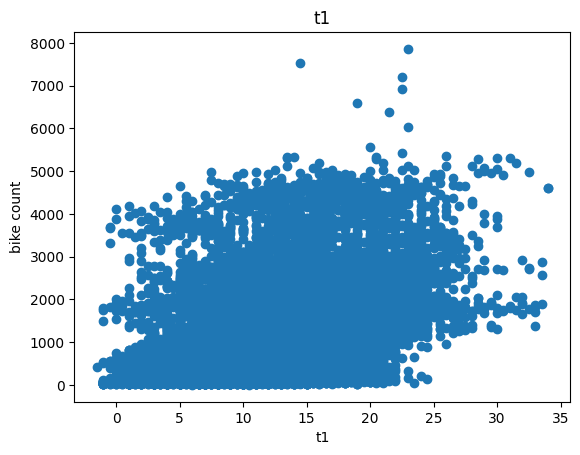

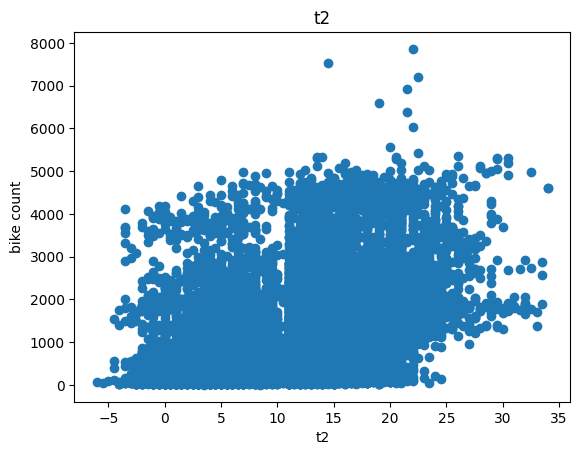

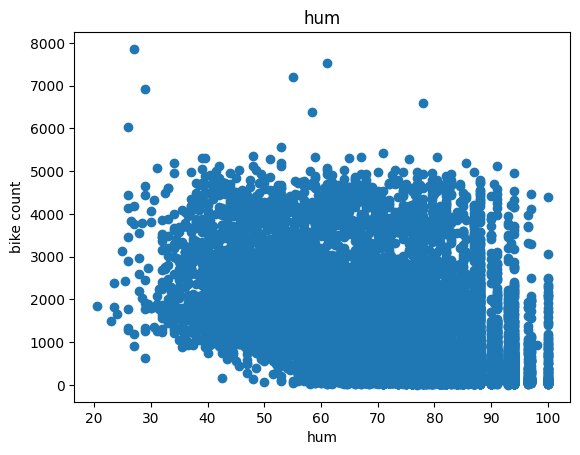

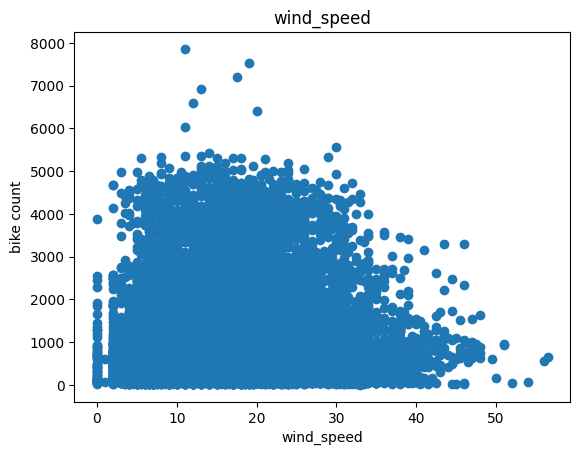

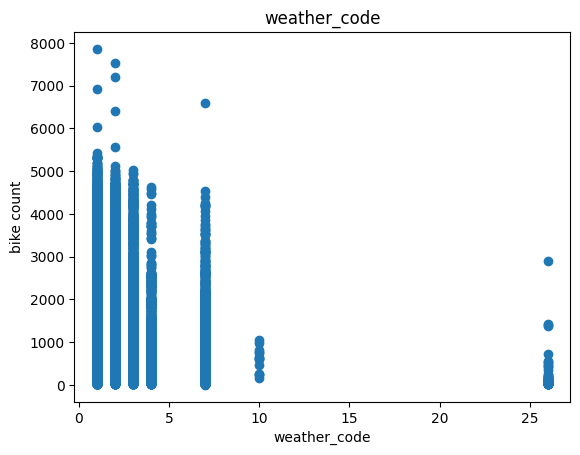

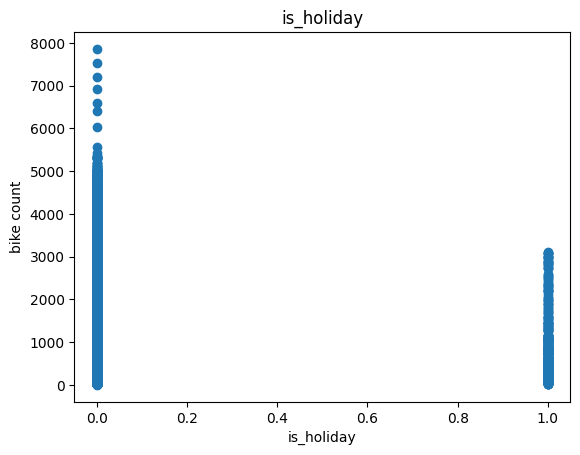

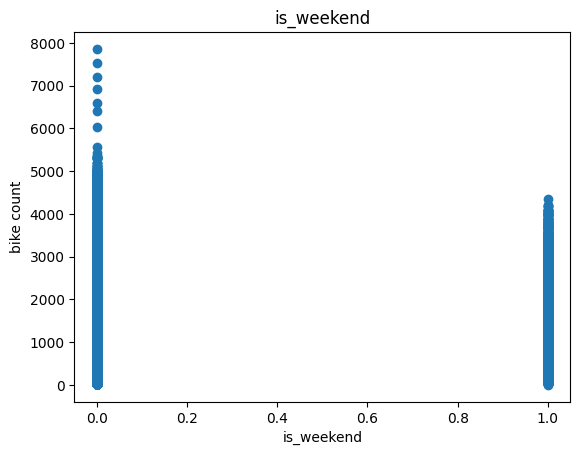

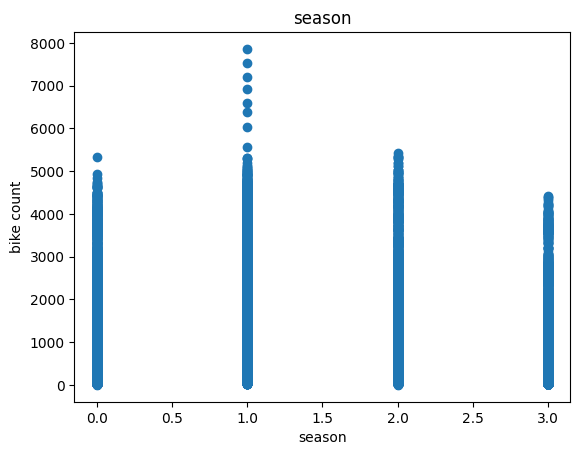

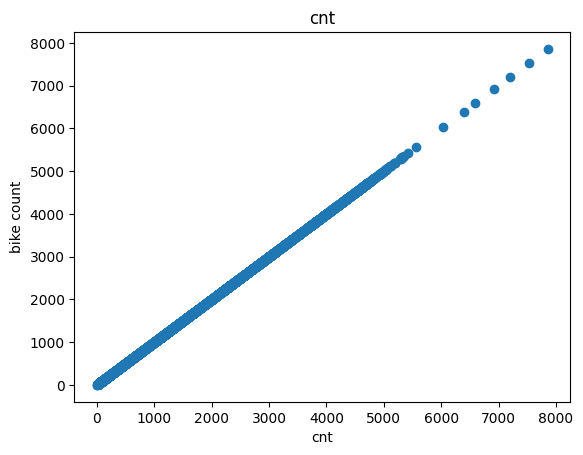

In [ ]:
for label in df.columns:
  plt.scatter(df[label], df['cnt'])
  plt.title(label)
  plt.ylabel('bike count')
  plt.xlabel(label)
  plt.show()

In [ ]:
df = df.drop(columns= ['season'])

In [ ]:
df['weather_code'].unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

In [ ]:
weather_code = {1: 1, 2: 2, 3: 3, 4:4, 7:5, 10:6, 26:7}
df['weather_code'] = df['weather_code'].map(weather_code)

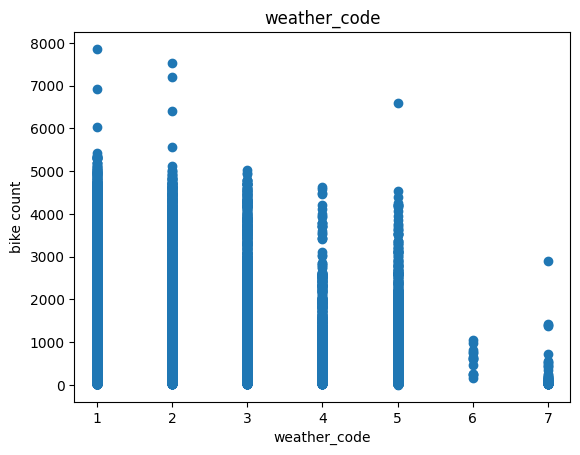

In [ ]:
plt.scatter(df['weather_code'], df['cnt'])
plt.title('weather_code')
plt.ylabel('bike count')
plt.xlabel('weather_code')
plt.show()

In [ ]:
def scale_dataset(df):
    num_cols = ["t1", "t2", "hum", "wind_speed"]
    cat_cols = ["weather_code", "is_holiday", "is_weekend"]

    X_num = df[num_cols].values
    X_cat = df[cat_cols].values
    y = df["cnt"].values

    scaler = StandardScaler()
    X_num = scaler.fit_transform(X_num)

    X = np.hstack((X_num, X_cat))

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [ ]:
train, test = np.split(df, [int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
train, X_train, y_train = scale_dataset(train)
test, X_test, y_test = scale_dataset(test)

In [ ]:
from numpy.typing import NDArray

In [ ]:
def get_derivative(model_prediction: NDArray[np.float64], ground_truth: NDArray[np.float64], N: int, X: NDArray[np.float64], desired_weight: int) -> float:
  return -2 * np.dot(ground_truth - model_prediction, X[:, desired_weight]) / N

def get_model_prediction(X: NDArray[np.float64], weights: NDArray[np.float64]) -> NDArray[np.float64]:
  return np.squeeze(np.matmul(X, weights))

def get_error(model_prediction: NDArray[np.float64], ground_truth: NDArray[np.float64]) -> float:
  answer = ground_truth - model_prediction
  answer = np.square(answer)
  answer = np.mean(answer)
  return answer

def get_minimizer(iterations: int, learning_rate: float, init: int) -> float:
  for i in range(iterations):
      d = 2 * init
      init -=  learning_rate * d
  return init

In [ ]:
def train_model(X: NDArray[np.float64], Y: NDArray[np.float64], num_iterations: int, initial_weights: NDArray[np.float64]) -> NDArray[np.float64]:
  weights = initial_weights.copy()

  for i in range(num_iterations):
      prediction = get_model_prediction(X, initial_weights)
      error = get_error(prediction, Y)
      for i,weight in enumerate(initial_weights):
          derivative = get_derivative(prediction, Y, len(X), X, i)
          #weight -= 0.01*derivative
          initial_weights[i] -= 0.01*derivative

  return initial_weights

In [ ]:
initial_weights = np.zeros(X_train.shape[1])
trained_weights = train_model(X_train, y_train, 1000, initial_weights)

In [ ]:
y_pred = get_model_prediction(X_test, trained_weights)

In [ ]:
test_error = get_error(y_pred, y_test)
print("Test MSE:", test_error)

Test MSE: 1320426.8286379254


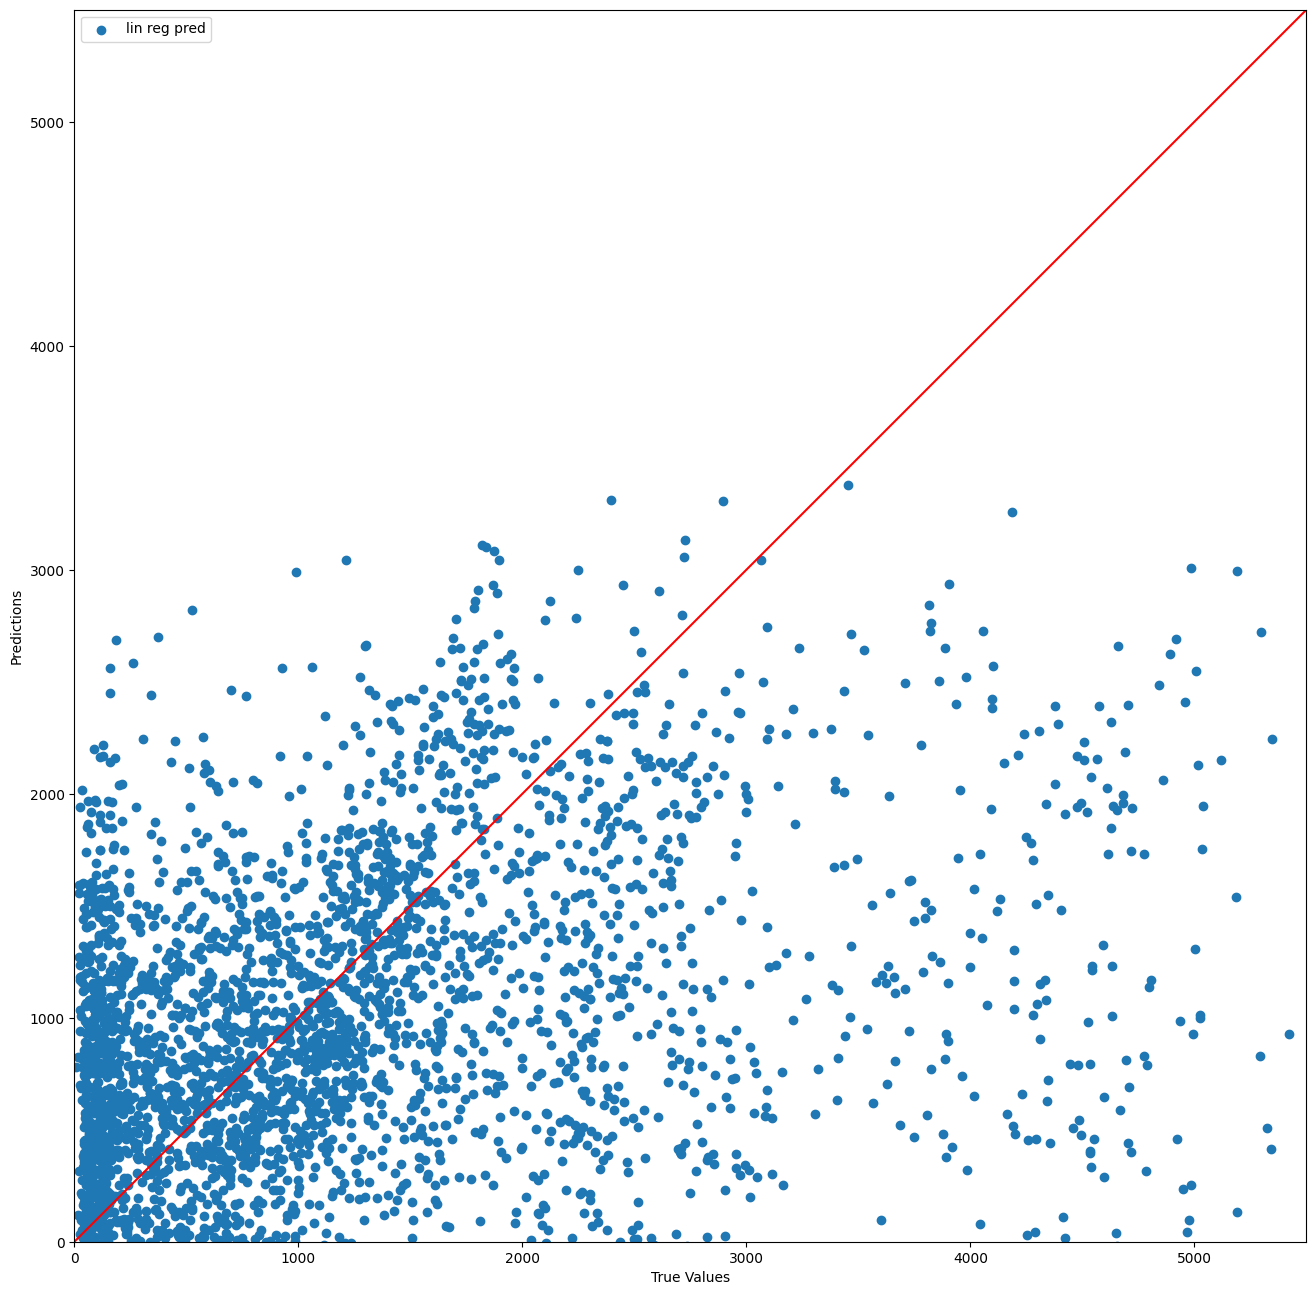

In [ ]:
plt.figure(figsize=(16, 16))
ax = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, label='lin reg pred')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5500]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, c='red')
plt.legend()
plt.show()

#Conclusion
Hard to say whether the result is good or bad, the RMSE is about 1100 which could be a big difference in this context. However, in the grand scheme of things it works, and it did give out a reasonable solution. The primary goal of this exercise was to gain a deeper understanding of linear regression by building a model from scratch, and not to achieve the perfect solution. Future work might focus on refining the model through feature engineering or exploring more complex algorithms.